<a href="https://colab.research.google.com/github/fasyaryn/Data-Analysis/blob/main/Customer_Segmentation_and_Promo_Sensitivity_Analysis_of_Revo_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation and Promo Sensitivity Analysis of Revo Bank

## Load Dataset

In [ ]:
# Import Library
import gdown        # untuk download data dari google drive
import pandas as pd # untuk load dan mengolah tabel/csv/excel/gsheet
import numpy as np  # untuk mengolah data
import matplotlib.pyplot as plt
import seaborn as sns # Data visualization
from datetime import datetime # untuk mengolah data tanggal dan waktu

In [ ]:
from sklearn.cluster import KMeans # K-means clustering

In [ ]:

from yellowbrick.cluster import SilhouetteVisualizer # Untuk melakukan analisis siluet untuk k-means clustering

In [ ]:
#define a variable name (to your liking) and assign the link with single quote.
potter_url = 'https://drive.google.com/file/d/1D9mcpYgyP-9H-CRYmuhXQJDPbugTic9D/view?usp=sharing'

#next we define a variable 'potter' with the trick
potter = 'https://drive.google.com/uc?id='+ potter_url.split('/')[-2] #we use this trick to get the id of the file


In [ ]:
#then we read the potter variable using pandas function .read_csv whilst also assigning them to new variable called 'df'
# using 'df' as a variable is the most common way in data industry
# df in variable stands for dataframe
# but you are free to name the variable to your liking. As long as it is not the same as the libraries function or the in-built python function

df = pd.read_csv(potter)
df

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29
112632,101059866,5262-MARKETPLACES,REVOSHOP,84.0,64.4,85.0,50.0,5.0,25.0,4.0,...,E,Y,0.0,24294.0,0.0,30.0,112.0,0.0,0.0,1982-05-14


##Check Dataset Before Cleaning

Ensure:


*   All dates in correct format
*   Remove any duplicates
*   Handle any missing values
*   Check for any typos in the data (compare against data dictionary)
*   Create new column to calculate client's age. Calcualate it as of January, 31, 2023.
*   Create new column promo sensitivity for the future analysis.

Data dictionary : https://docs.google.com/spreadsheets/d/1-rHnt65_3MSINBv14I1TwSaRV9xGwDY11HNkaiFOdgo/edit?usp=sharing

Deck Presentation : https://docs.google.com/presentation/d/13pG8gKSkzKLt9cyQpa2DQBbGeaj9gnip14l4L5Sey9k/edit?usp=sharing

###Info & Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             112634 non-null  int64  
 1   MCC                    112634 non-null  object 
 2   MERCHANT_NAME          112634 non-null  object 
 3   AVG_TXN_AMT_L6M        112634 non-null  float64
 4   AVG_TXN_AMT_LTM        112634 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64
 7   TXN_CNT_L6M            112634 non-null  float64
 8   TXN_CNT_LTM            112634 non-null  float64
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64
 11  LAST_TXN_DAY           112634 non-null  float64
 12  CNT_PROMO_L6M          112634 non-null  float64
 13  CNT_PROMO_L12M         112634 non-null  float64
 14  CUST_VALUE_GROUP       112634 non-nu

**Findings:**


*   There isn't null data in df


### Unique Value
Check unique values and compare to the data dictionary. We need to treat value that is not tally with data dictionary

In [ ]:
for column_name in df.columns:
  print(column_name)
  print(df[column_name].value_counts())
  print('\n')

ACCOUNT_ID
100070125    2
100502294    2
100771163    2
100376790    2
100950065    2
            ..
100356812    1
100356810    1
100356795    1
100356780    1
101059869    1
Name: ACCOUNT_ID, Length: 112433, dtype: int64


MCC
5262-MARKETPLACES         112633
5311-DEPARTMENT STORES         1
Name: MCC, dtype: int64


MERCHANT_NAME
REVOSHOP           91168
REVOSH MKTPLC      19965
TOKTOKLIVE          1500
EL CORTE INGLES        1
Name: MERCHANT_NAME, dtype: int64


AVG_TXN_AMT_L6M
100.0    12373
150.0     4245
50.0      3794
110.0     3533
120.0     2970
         ...  
208.8        1
540.0        1
302.5        1
26.3         1
397.5        1
Name: AVG_TXN_AMT_L6M, Length: 1033, dtype: int64


AVG_TXN_AMT_LTM
100.0    855
50.0     699
90.0     638
80.0     636
70.0     578
        ... 
575.0      1
362.5      1
215.6      1
296.5      1
30.2       1
Name: AVG_TXN_AMT_LTM, Length: 2353, dtype: int64


AVG_PROMO_TXN_AMT_L6M
100.0    17677
50.0      6476
150.0     5958
120.0     4103
200

In [ ]:
df.describe()

,ACCOUNT_ID,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL
count,1.126340e+05,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000
mean,1.005322e+08,127.478237,107.330904,121.748952,120.357605,4.473063,20.091420,2.768276,10.307412,18.328693,5.753742,14.410826,0.529112,88521.650976,38141.285473,31.030373,101.480761,0.585063,0.300513
std,3.058731e+05,79.849703,75.395159,82.164770,76.666629,2.299819,8.902769,1.712656,4.383864,4.181466,1.409411,6.006054,0.499154,71826.805193,25894.347936,12.041558,25.552335,0.492713,0.458483
min,1.000000e+08,10.000000,17.300000,-1.000000,3.200000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,1.002677e+08,85.000000,70.000000,75.700000,80.000000,3.000000,14.000000,1.000000,7.000000,16.000000,5.000000,12.000000,0.000000,47320.000000,24953.250000,25.000000,81.000000,0.000000,0.000000
50%,1.005338e+08,110.000000,92.900000,100.000000,100.000000,4.000000,18.000000,2.000000,10.000000,18.000000,6.000000,13.000000,1.000000,66944.000000,41915.000000,31.000000,105.000000,1.000000,0.000000
75%,1.007976e+08,150.000000,124.200000,150.000000,150.000000,6.000000,23.000000,4.000000,12.000000,21.000000,6.000000,14.000000,1.000000,98392.750000,53670.000000,38.000000,125.000000,1.000000,1.000000
max,1.010599e+08,2000.000000,3010.000000,2000.000000,2500.000000,18.000000,127.000000,10.000000,46.000000,28.000000,21.000000,76.000000,1.000000,600050.000000,200003.000000,100.000000,570.000000,1.000000,1.000000


**Findings:**
*   Need to update data type.
*   there is duplicated data in ACCOUNT_ID.
*   [MCC] column, should only contains 5262-MARKETPLACES. other than that need to delete
*   in MERCHANT_NAME, Both REVOSHOP and REVOSH MKTPLC refers to RevoShop. change REVOSH MKTPLC to REVOSHOP. And we can delete the others.
*   There is negative value in AVG_PROMO_TXN_AMT_L6M, it is not expected because this data can not be negative. assume this data is unknown/null.


###Duplicated Value

Kita bisa mencari nilai duplikat dengan:
- `df[df.duplicated()]` untuk melihat baris yang nilainya berulang (jika ada)
- `df[df[col].duplicated()]` untuk melihat baris yang nilai `col`-nya berulang

In [ ]:
df[df.duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
# df['MERCHANT_NAME'] == 'REVOSHMKTPLC'
# df['ACCOUNT_ID'].duplicated()

df.loc[df['ACCOUNT_ID'].duplicated(keep=False)]


,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
168,100000600,5262-MARKETPLACES,REVOSH MKTPLC,166.7,150.0,150.0,150.0,4.0,19.0,3.0,...,A,X,1.0,75705.0,48865.0,1.0,129.0,1.0,0.0,1988-05-16
169,100000600,5262-MARKETPLACES,TOKTOKLIVE,250.0,131.7,250.0,100.0,2.0,25.0,2.0,...,A,X,1.0,75705.0,48865.0,1.0,129.0,1.0,0.0,1988-05-16
1835,100017966,5262-MARKETPLACES,TOKTOKLIVE,172.0,128.2,172.0,160.0,5.0,17.0,5.0,...,B,X,1.0,163791.0,87214.0,23.0,92.0,0.0,0.0,1985-02-11
1836,100017966,5262-MARKETPLACES,REVOSH MKTPLC,150.0,78.8,150.0,100.0,3.0,17.0,2.0,...,B,X,1.0,163791.0,87214.0,23.0,92.0,0.0,0.0,1985-02-11
1889,100018465,5262-MARKETPLACES,REVOSH MKTPLC,90.0,81.0,90.0,140.0,4.0,21.0,3.0,...,B,X,1.0,64423.0,47589.0,20.0,102.0,1.0,1.0,1972-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110857,101045627,5262-MARKETPLACES,REVOSHOP,57.3,56.2,50.0,50.0,11.0,34.0,4.0,...,E,X,1.0,53316.0,39696.0,38.0,91.0,0.0,0.0,1987-07-23
110877,101045690,5262-MARKETPLACES,REVOSHOP,100.0,91.8,100.0,100.0,3.0,17.0,2.0,...,E,X,0.0,26290.0,36366.0,36.0,126.0,1.0,0.0,1980-08-18
110878,101045690,5262-MARKETPLACES,TOKTOKLIVE,106.7,98.8,100.0,130.0,2.0,23.0,1.0,...,E,X,0.0,26290.0,36366.0,36.0,126.0,1.0,0.0,1980-08-18
111643,101051711,5262-MARKETPLACES,TOKTOKLIVE,90.0,71.0,83.3,50.0,5.0,20.0,3.0,...,C,X,0.0,37820.0,0.0,32.0,130.0,1.0,0.0,1972-04-22


**FIndings:**
*   There's many duplicated ACCOUNT_ID



###Summary of Data Issue
*   Need to update data type.
*   [MCC] column, should only contains 5262-MARKETPLACES. other than that need to delete
*   in MERCHANT_NAME, Both REVOSHOP and REVOSH MKTPLC refers to RevoShop. change REVOSH MKTPLC to REVOSHOP. And we can delete the others.
*   There is negative value in AVG_PROMO_TXN_AMT_L6M, it is not expected because this data can not be negative. assume this data is unknown/null.
*   There's many duplicated ACCOUNT_ID

##Data Cleaning

###Copy Dataset

In [ ]:
revobank = df.copy()
revobank

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29
112632,101059866,5262-MARKETPLACES,REVOSHOP,84.0,64.4,85.0,50.0,5.0,25.0,4.0,...,E,Y,0.0,24294.0,0.0,30.0,112.0,0.0,0.0,1982-05-14


###Update data types and add customer age

In [ ]:
revobank = revobank.convert_dtypes() # to convert the DataFrame to the best possible dtypes.
revobank.dtypes

ACCOUNT_ID                 Int64
MCC                       string
MERCHANT_NAME             string
AVG_TXN_AMT_L6M          Float64
AVG_TXN_AMT_LTM          Float64
AVG_PROMO_TXN_AMT_L6M    Float64
AVG_PROMO_TXN_AMT_LTM    Float64
TXN_CNT_L6M                Int64
TXN_CNT_LTM                Int64
PROMO_TXN_CNT_L6M          Int64
PROMO_TXN_CNT_LTM          Int64
LAST_TXN_DAY               Int64
CNT_PROMO_L6M              Int64
CNT_PROMO_L12M             Int64
CUST_VALUE_GROUP          string
MAPP_ACTIVE_GROUP         string
HOMEOWNER_STATUS           Int64
HOME_VALUE                 Int64
PROXY_INCOME               Int64
PCT_INCOME_RETIREMENT      Int64
MOB                        Int64
FLAG_FEMALE                Int64
PROMO_CHANNEL              Int64
BIRTH_DATE                string
dtype: object

In [ ]:
revobank['BIRTH_DATE'] = pd.to_datetime(revobank['BIRTH_DATE'], format = '%Y-%m-%d') # to convert birth_date to datetime.
revobank['BIRTH_DATE']

0        1975-12-17
1        1991-12-27
2        1970-03-22
3        1983-11-26
4        1989-10-21
            ...    
112629   1993-07-14
112630   1980-02-19
112631   1986-12-29
112632   1982-05-14
112633   1983-12-17
Name: BIRTH_DATE, Length: 112634, dtype: datetime64[ns]

In [ ]:
revobank['AGE']=(datetime(year=2023, month=1, day=31) - revobank['BIRTH_DATE']) // np.timedelta64(1,'Y') # Add 'AGE' column
revobank

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,AGE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5,21,2,...,X,0,90587,59785,32,123,1,0,1975-12-17,47
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3,22,2,...,X,0,65814,32597,34,109,1,0,1991-12-27,31
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4,12,2,...,X,0,42583,0,1,89,0,0,1970-03-22,52
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8,27,6,...,X,0,61176,0,0,86,1,1,1983-11-26,39
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5,44,4,...,X,0,44525,42253,22,124,1,0,1989-10-21,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3,22,1,...,Y,0,27087,35533,33,68,0,0,1993-07-14,29
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7,28,3,...,Y,0,26302,0,27,125,0,1,1980-02-19,42
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3,23,2,...,Y,1,70105,41249,63,116,1,0,1986-12-29,36
112632,101059866,5262-MARKETPLACES,REVOSHOP,84.0,64.4,85.0,50.0,5,25,4,...,Y,0,24294,0,30,112,0,0,1982-05-14,40


### Update Data and Cleaning Unnecessary Data

In [ ]:
revobank = revobank.loc[revobank['MCC']=='5262-MARKETPLACES'] # to delete row data if 'MCC' is not 5262-MARKETPLACES
revobank

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,AGE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5,21,2,...,X,0,90587,59785,32,123,1,0,1975-12-17,47
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3,22,2,...,X,0,65814,32597,34,109,1,0,1991-12-27,31
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4,12,2,...,X,0,42583,0,1,89,0,0,1970-03-22,52
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8,27,6,...,X,0,61176,0,0,86,1,1,1983-11-26,39
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5,44,4,...,X,0,44525,42253,22,124,1,0,1989-10-21,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2,12,2,...,X,0,47708,0,48,124,0,1,1979-05-24,43
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3,22,1,...,Y,0,27087,35533,33,68,0,0,1993-07-14,29
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7,28,3,...,Y,0,26302,0,27,125,0,1,1980-02-19,42
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3,23,2,...,Y,1,70105,41249,63,116,1,0,1986-12-29,36


In [ ]:
revobank.loc[(revobank['MERCHANT_NAME'] == 'REVOSH MKTPLC'),['MERCHANT_NAME']] = ['REVOSHOP'] # change merchant name REVOSH MKTPLC to REVOSHOP
revobank['MERCHANT_NAME'].value_counts()

REVOSHOP      111133
TOKTOKLIVE      1500
Name: MERCHANT_NAME, dtype: Int64

In [ ]:
revobank2 = revobank.loc[revobank['MERCHANT_NAME'] == 'REVOSHOP'] # delete rows if merchant name is not REVOSHOP
revobank2

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,AGE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5,21,2,...,X,0,90587,59785,32,123,1,0,1975-12-17,47
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3,22,2,...,X,0,65814,32597,34,109,1,0,1991-12-27,31
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4,12,2,...,X,0,42583,0,1,89,0,0,1970-03-22,52
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8,27,6,...,X,0,61176,0,0,86,1,1,1983-11-26,39
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5,44,4,...,X,0,44525,42253,22,124,1,0,1989-10-21,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2,12,2,...,X,0,47708,0,48,124,0,1,1979-05-24,43
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3,22,1,...,Y,0,27087,35533,33,68,0,0,1993-07-14,29
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7,28,3,...,Y,0,26302,0,27,125,0,1,1980-02-19,42
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3,23,2,...,Y,1,70105,41249,63,116,1,0,1986-12-29,36


###Check duplicated Account_id

In [ ]:
revobank2.loc[revobank2['ACCOUNT_ID'].duplicated()] # There is no more duplicated account_id

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,AGE


###Missing Value

In [ ]:
revobank2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111133 entries, 0 to 112632
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             111133 non-null  Int64         
 1   MCC                    111133 non-null  string        
 2   MERCHANT_NAME          111133 non-null  string        
 3   AVG_TXN_AMT_L6M        111133 non-null  Float64       
 4   AVG_TXN_AMT_LTM        111133 non-null  Float64       
 5   AVG_PROMO_TXN_AMT_L6M  111133 non-null  Float64       
 6   AVG_PROMO_TXN_AMT_LTM  111133 non-null  Float64       
 7   TXN_CNT_L6M            111133 non-null  Int64         
 8   TXN_CNT_LTM            111133 non-null  Int64         
 9   PROMO_TXN_CNT_L6M      111133 non-null  Int64         
 10  PROMO_TXN_CNT_LTM      111133 non-null  Int64         
 11  LAST_TXN_DAY           111133 non-null  Int64         
 12  CNT_PROMO_L6M          111133 non-null  Int6

In [ ]:
revobank2.describe()

,ACCOUNT_ID,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,AGE
count,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.0,111133.000000
mean,100532136.985378,127.479784,107.338797,121.736302,120.354979,4.47229,20.091845,2.767585,10.308783,18.329938,5.753979,14.409878,0.529141,88549.791061,38132.022244,31.028533,101.489432,0.584849,0.300388,39.975732
std,305825.664828,79.837708,75.412155,82.121813,76.589144,2.299088,8.902843,1.712122,4.384038,4.182346,1.409499,6.004931,0.499152,71842.040591,25897.806905,12.047465,25.559089,0.49275,0.458429,5.655481
min,100000004.0,10.0,17.3,-1.0,3.2,1.0,3.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,17.000000
25%,100267711.0,85.0,70.0,75.0,80.0,3.0,14.0,1.0,7.0,16.0,5.0,12.0,0.0,47326.0,24924.0,25.0,81.0,0.0,0.0,36.000000
50%,100533641.0,110.0,92.9,100.0,100.0,4.0,18.0,2.0,10.0,18.0,6.0,13.0,1.0,66963.0,41908.0,31.0,105.0,1.0,0.0,40.000000
75%,100797581.0,150.0,124.2,150.0,150.0,6.0,23.0,4.0,12.0,21.0,6.0,14.0,1.0,98430.0,53638.0,38.0,125.0,1.0,1.0,44.000000
max,101059866.0,2000.0,3010.0,2000.0,2500.0,18.0,127.0,10.0,46.0,28.0,21.0,76.0,1.0,600050.0,200003.0,100.0,570.0,1.0,1.0,66.000000


In [ ]:
revobank2.loc[revobank2['AVG_PROMO_TXN_AMT_L6M'] < 0] # Check data with negative value for this column.
# 3475 data AVG_PROMO_TXN_AMT_L6M is missing. It is 3% from data (less than 10%), so we decide to delete the row.

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,AGE
32,100000133,5262-MARKETPLACES,REVOSHOP,233.3,180.0,-1.0,100.0,4,9,1,...,X,0,347926,0,1,66,1,1,1985-12-21,37
82,100000302,5262-MARKETPLACES,REVOSHOP,250.0,185.6,-1.0,220.0,2,44,1,...,X,0,0,0,1,124,1,1,1982-02-24,40
104,100000357,5262-MARKETPLACES,REVOSHOP,140.0,102.5,-1.0,140.0,2,25,1,...,X,0,85733,67273,1,106,0,0,1983-08-22,39
117,100000387,5262-MARKETPLACES,REVOSHOP,250.0,240.7,-1.0,200.0,2,47,1,...,X,0,0,0,1,212,1,0,1983-11-21,39
166,100000591,5262-MARKETPLACES,REVOSHOP,110.0,79.5,-1.0,110.0,2,22,1,...,X,1,133906,47075,1,130,0,0,1977-04-18,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112339,101057451,5262-MARKETPLACES,REVOSHOP,160.0,112.1,-1.0,160.0,2,15,1,...,X,0,15028,46247,46,124,1,0,1983-12-24,39
112368,101057690,5262-MARKETPLACES,REVOSHOP,225.0,325.0,-1.0,250.0,3,11,1,...,X,1,27511,30431,44,102,0,0,1981-04-23,41
112399,101057929,5262-MARKETPLACES,REVOSHOP,150.0,86.7,-1.0,100.0,3,13,1,...,X,1,33695,41835,36,106,1,0,1977-10-26,45
112479,101058836,5262-MARKETPLACES,REVOSHOP,100.0,73.3,-1.0,100.0,4,25,1,...,X,0,28398,0,26,122,1,1,1981-08-25,41


In [ ]:
revobank3 = revobank2.loc[~(revobank2['AVG_PROMO_TXN_AMT_L6M'] < 0)] # Delete row that have missing value.
revobankc = revobank3
revobankc

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,AGE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5,21,2,...,X,0,90587,59785,32,123,1,0,1975-12-17,47
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3,22,2,...,X,0,65814,32597,34,109,1,0,1991-12-27,31
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4,12,2,...,X,0,42583,0,1,89,0,0,1970-03-22,52
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8,27,6,...,X,0,61176,0,0,86,1,1,1983-11-26,39
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5,44,4,...,X,0,44525,42253,22,124,1,0,1989-10-21,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2,12,2,...,X,0,47708,0,48,124,0,1,1979-05-24,43
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3,22,1,...,Y,0,27087,35533,33,68,0,0,1993-07-14,29
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7,28,3,...,Y,0,26302,0,27,125,0,1,1980-02-19,42
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3,23,2,...,Y,1,70105,41249,63,116,1,0,1986-12-29,36


###Add promo-sensitive customers

In [ ]:
# total_sales_ltm = (revobankc['AVG_TXN_AMT_LTM'] * revobankc['TXN_CNT_LTM']).sum()
# total_promo_sales_ltm = (revobankc['AVG_PROMO_TXN_AMT_LTM'] * revobankc['PROMO_TXN_CNT_LTM']).sum()
# # print(total_sales_ltm , total_promo_sales_ltm)

# revobankc.loc[(revobankc['PROMO_TXN_CNT_LTM']/revobankc['TXN_CNT_LTM'])>0.5,['PROMO_SENSITIVE']] = 1    # Promo sensitive customer indicated with 1
# revobankc.loc[(revobankc['PROMO_TXN_CNT_LTM']/revobankc['TXN_CNT_LTM'])<=0.5,['PROMO_SENSITIVE']] = 0   # Not Promo sensitive customer indicated with 0
# revobankc['PROMO_SENSITIVE'] = revobankc['PROMO_SENSITIVE'].astype(int)
# revobankc

We want to identify promo-sensitive customers. A customer is considered promo-sensitive if more than 50% of their total sales in the RevoShop are attributed to promo.

In [ ]:
# For the lifetime promo-sensitive

# Calculate total sales with and without promo, and the ratio between the two
revobankc['TOTAL_SALES_LTM'] = revobankc['AVG_TXN_AMT_LTM'] * revobankc['TXN_CNT_LTM']
revobankc['TOTAL_SALES_PROMO_LTM'] = revobankc['AVG_PROMO_TXN_AMT_LTM'] * revobankc['PROMO_TXN_CNT_LTM']
revobankc['R_SALES_PROMO_LTM'] = revobankc['TOTAL_SALES_PROMO_LTM']/revobankc['TOTAL_SALES_LTM']

# Create a promo-sensitive flags on lifetime basis
revobankc.loc[(revobankc['R_SALES_PROMO_LTM'] > 0.5),'PROMO_SENSITIVE'] = 1 # Promo sensitive customer indicated with 1
revobankc.loc[(revobankc['R_SALES_PROMO_LTM'] <= 0.5),'PROMO_SENSITIVE'] = 0 # Not Promo sensitive customer indicated with 0

<ipython-input-24-3e55a7c0f956>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revobankc['TOTAL_SALES_LTM'] = revobankc['AVG_TXN_AMT_LTM'] * revobankc['TXN_CNT_LTM']
<ipython-input-24-3e55a7c0f956>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revobankc['TOTAL_SALES_PROMO_LTM'] = revobankc['AVG_PROMO_TXN_AMT_LTM'] * revobankc['PROMO_TXN_CNT_LTM']
<ipython-input-24-3e55a7c0f956>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
# For the L6M promo-sensitive

# Calculate total sales with and without promo, and the ratio between the two
revobankc['TOTAL_SALES_L6M'] = revobankc['AVG_TXN_AMT_L6M'] * revobankc['TXN_CNT_L6M']
revobankc['TOTAL_SALES_PROMO_L6M'] = revobankc['AVG_PROMO_TXN_AMT_L6M'] * revobankc['PROMO_TXN_CNT_L6M']
revobankc['R_SALES_PROMO_L6M'] = revobankc['TOTAL_SALES_PROMO_L6M']/revobankc['TOTAL_SALES_L6M']

# Create a promo-sensitive flags on 6 month basis
revobankc.loc[(revobankc['R_SALES_PROMO_L6M'] > 0.5),'PROMO_SENSITIVE_L6M'] = 1
revobankc.loc[(revobankc['R_SALES_PROMO_L6M'] <= 0.5),'PROMO_SENSITIVE_L6M'] = 0

revobankc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  Int64         
 1   MCC                    107658 non-null  string        
 2   MERCHANT_NAME          107658 non-null  string        
 3   AVG_TXN_AMT_L6M        107658 non-null  Float64       
 4   AVG_TXN_AMT_LTM        107658 non-null  Float64       
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  Float64       
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  Float64       
 7   TXN_CNT_L6M            107658 non-null  Int64         
 8   TXN_CNT_LTM            107658 non-null  Int64         
 9   PROMO_TXN_CNT_L6M      107658 non-null  Int64         
 10  PROMO_TXN_CNT_LTM      107658 non-null  Int64         
 11  LAST_TXN_DAY           107658 non-null  Int64         
 12  CNT_PROMO_L6M          107658 non-null  Int6

<ipython-input-25-77f15cb2a84d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revobankc['TOTAL_SALES_L6M'] = revobankc['AVG_TXN_AMT_L6M'] * revobankc['TXN_CNT_L6M']
<ipython-input-25-77f15cb2a84d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revobankc['TOTAL_SALES_PROMO_L6M'] = revobankc['AVG_PROMO_TXN_AMT_L6M'] * revobankc['PROMO_TXN_CNT_L6M']
<ipython-input-25-77f15cb2a84d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
#Save File
revobankc.to_pickle('revobankc.pkl')

##EDA

How much total sales have been generated in RevosShop over the past 6 months?

In [ ]:
total_sales_6 = revobankc['TOTAL_SALES_L6M'].sum()

How many sales were made in response to the promo in the last 6 months?

In [ ]:
total_promo_sales_6 = revobankc['TOTAL_SALES_PROMO_L6M'].sum()

What is the total cost of the promotion over the past 6 months?

In [ ]:
total_promo_cost_6 = ((revobankc['PROMO_TXN_CNT_L6M']).sum())*1.5

What is the total revenue generated by the promo in the past 6 months?

In [ ]:
total_revenue_6 = total_sales_6 * 2.4/100
total_revenue_6

1359341.2536

How many customers are considered promo-sensitive?

In [ ]:
promo_sensitive_cust = revobankc['PROMO_SENSITIVE'].sum()
promo_sensitive_cust

73461.0

Is there any difference in transaction behavior and promo sensitive between active and inactive customers in the past 6 months?

In [ ]:
grouped_data = revobankc.groupby(['MAPP_ACTIVE_GROUP']).agg({
    'ACCOUNT_ID' : ['count']
    ,'PROMO_SENSITIVE' : ['sum']
    ,'AVG_TXN_AMT_L6M' : ['mean']
    ,'TXN_CNT_L6M' : ['sum']
}).reset_index()
grouped_data
# X : High activity
# Y : Average Activity
# Z : Low Activity

,MAPP_ACTIVE_GROUP,ACCOUNT_ID,PROMO_SENSITIVE,AVG_TXN_AMT_L6M,TXN_CNT_L6M
,,count,sum,mean,sum
0,X,100141,68384.0,126.648324,454674
1,Y,7036,4911.0,128.039298,29923
2,Z,481,166.0,139.574636,2500


In [ ]:
grouped_data.columns

MultiIndex([('MAPP_ACTIVE_GROUP',      ''),
            (       'ACCOUNT_ID', 'count'),
            (  'PROMO_SENSITIVE',   'sum'),
            (  'AVG_TXN_AMT_L6M',  'mean'),
            (      'TXN_CNT_L6M',   'sum')],
           )

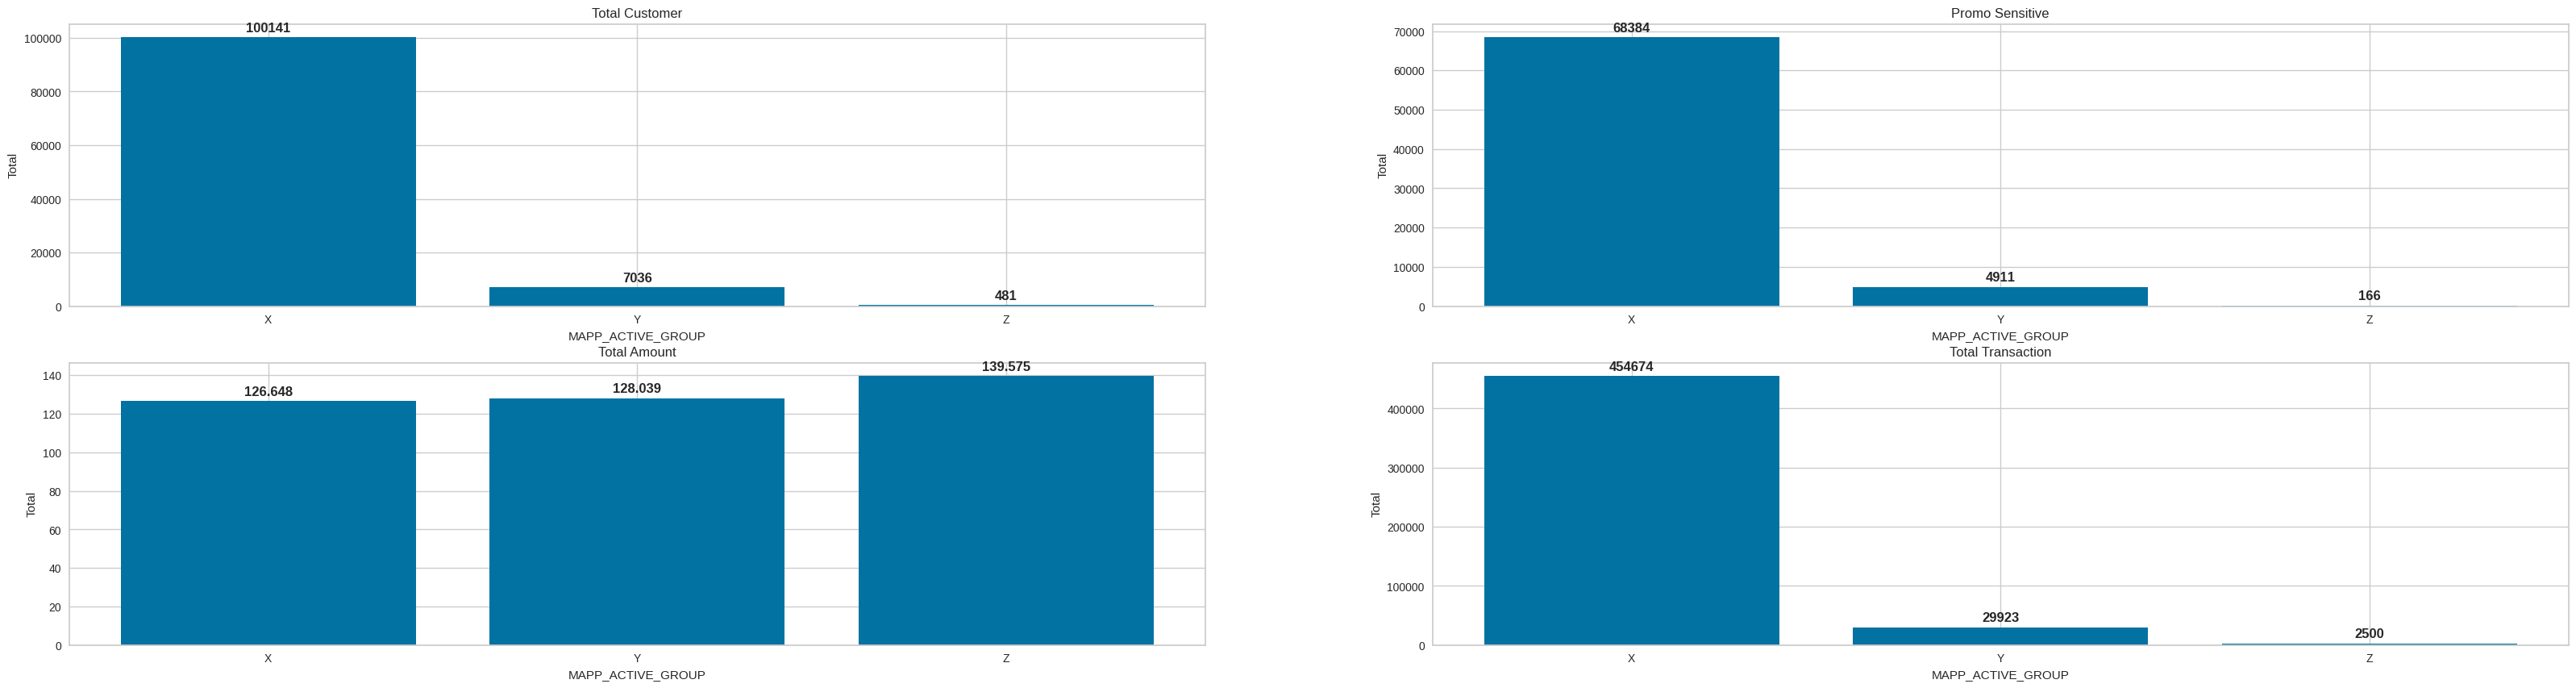

In [ ]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(40, 10))



x = grouped_data[ 'MAPP_ACTIVE_GROUP','']
y1 = grouped_data['ACCOUNT_ID',     'count']
y2=grouped_data[  'PROMO_SENSITIVE','sum']
y3=grouped_data[  'AVG_TXN_AMT_L6M','mean']
y4=grouped_data[  'TXN_CNT_L6M',    'sum']

a = ax1.bar(x, y1)
ax1.bar_label(a, padding=3, fontweight='bold')
ax1.set_title('Total Customer')
ax1.set_xlabel('MAPP_ACTIVE_GROUP')
ax1.set_ylabel('Total')

b = ax2.bar(x, y2)
ax2.bar_label(b, padding=3, fontweight='bold')
ax2.set_title('Promo Sensitive')
ax2.set_xlabel('MAPP_ACTIVE_GROUP')
ax2.set_ylabel('Total')

c = ax3.bar(x, y3)
ax3.bar_label(c, padding=3, fontweight='bold')
ax3.set_title('Total Amount')
ax3.set_xlabel('MAPP_ACTIVE_GROUP')
ax3.set_ylabel('Total')

d = ax4.bar(x, y4)
ax4.bar_label(d, padding=3, fontweight='bold')
ax4.set_title('Total Transaction')
ax4.set_xlabel('MAPP_ACTIVE_GROUP')
ax4.set_ylabel('Total')

plt.show()

In [ ]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (MAPP_ACTIVE_GROUP, )    3 non-null      string 
 1   (ACCOUNT_ID, count)      3 non-null      int64  
 2   (PROMO_SENSITIVE, sum)   3 non-null      float64
 3   (AVG_TXN_AMT_L6M, mean)  3 non-null      Float64
 4   (TXN_CNT_L6M, sum)       3 non-null      Int64  
dtypes: Float64(1), Int64(1), float64(1), int64(1), string(1)
memory usage: 254.0 bytes


Is there a relationship between increasing the number of email and SMS messages and improved sales performance?

In [ ]:
revobankc.groupby(['PROMO_CHANNEL']).agg({
    'AVG_TXN_AMT_LTM' : ['mean']
    ,'AVG_PROMO_TXN_AMT_LTM' : ['mean']
    ,'AVG_TXN_AMT_L6M' : ['mean']
    ,'AVG_PROMO_TXN_AMT_L6M' : ['mean']
    ,'TXN_CNT_LTM' : ['sum']
    ,'TXN_CNT_L6M' : ['sum']
    ,'PROMO_TXN_CNT_LTM' : ['sum']
    ,'PROMO_TXN_CNT_L6M' : ['sum']
})
# 0 : communication via SMS
# 1 : communication via E-mail

,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_LTM,AVG_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_L6M,TXN_CNT_LTM,TXN_CNT_L6M,PROMO_TXN_CNT_LTM,PROMO_TXN_CNT_L6M
,mean,mean,mean,mean,sum,sum,sum,sum
PROMO_CHANNEL,,,,,,,,
0,106.812511,119.978075,126.879248,125.814834,1517508,341046,780832,212978
1,106.835505,119.461973,126.605556,125.426132,652670,146051,335198,91089


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


<Axes: xlabel='CNT_PROMO_L6M', ylabel='PROMO_TXN_CNT_L6M'>

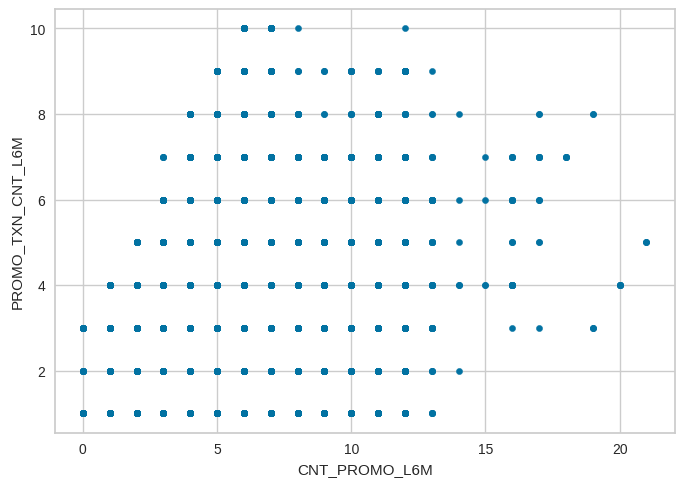

In [ ]:
revobankc.plot.scatter(x='CNT_PROMO_L6M',y='PROMO_TXN_CNT_L6M')

## Clustering RFM (Not Choosen, will use K-Mean instead)

In [ ]:
df_rfm = revobankc.copy()
df_rfm

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,BIRTH_DATE,AGE,TOTAL_SALES_LTM,TOTAL_SALES_PROMO_LTM,R_SALES_PROMO_LTM,PROMO_SENSITIVE,TOTAL_SALES_L6M,TOTAL_SALES_PROMO_L6M,R_SALES_PROMO_L6M,PROMO_SENSITIVE_L6M
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5,21,2,...,1975-12-17,47,4221.0,1750.0,0.414594,0.0,1080.0,400.0,0.37037,0.0
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3,22,2,...,1991-12-27,31,2510.2,1500.0,0.597562,1.0,429.9,280.0,0.651314,1.0
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4,12,2,...,1970-03-22,52,2912.4,1160.0,0.398297,0.0,1053.2,800.0,0.75959,1.0
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8,27,6,...,1983-11-26,39,5670.0,3900.0,0.687831,1.0,1884.8,1457.4,0.773239,1.0
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5,44,4,...,1989-10-21,33,3410.0,1890.0,0.554252,1.0,490.0,390.0,0.795918,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2,12,2,...,1979-05-24,43,1010.4,500.0,0.494854,0.0,200.0,200.0,1.0,1.0
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3,22,1,...,1993-07-14,29,2494.8,1000.0,0.400834,0.0,360.0,120.0,0.333333,0.0
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7,28,3,...,1980-02-19,42,1030.4,840.0,0.815217,1.0,370.3,140.1,0.378342,0.0
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3,23,2,...,1986-12-29,36,3387.9,2000.0,0.590336,1.0,585.0,380.0,0.649573,1.0


### Determining RFM Variables

In [ ]:
rfm_ = df_rfm[['ACCOUNT_ID', 'LAST_TXN_DAY', 'PROMO_TXN_CNT_L6M', 'TOTAL_SALES_PROMO_L6M']]
col_list = ['ACCOUNT_ID', 'RECENCY','FREQUENCY','MONETARY']
rfm_.columns = col_list
rfm_


,ACCOUNT_ID,RECENCY,FREQUENCY,MONETARY
0,100000004,15,2,400.0
1,100000008,20,2,280.0
2,100000012,16,2,800.0
3,100000014,20,6,1457.4
4,100000015,25,4,390.0
...,...,...,...,...
112628,101059832,4,2,200.0
112629,101059843,8,1,120.0
112630,101059857,19,3,140.1
112631,101059860,16,2,380.0


### Create RFM Scroe

In [ ]:
# Recency Score
pd.qcut(rfm_['RECENCY'], q = 5).value_counts().sort_index()

(1.999, 16.0]    28451
(16.0, 18.0]     32807
(18.0, 19.0]     10889
(19.0, 21.0]     14234
(21.0, 28.0]     21277
Name: RECENCY, dtype: int64

In [ ]:
# Frequency Score
pd.qcut(rfm_['FREQUENCY'], q = 5, duplicates = 'drop').value_counts().sort_index()

(0.999, 2.0]    55850
(2.0, 3.0]      20939
(3.0, 4.0]      13448
(4.0, 10.0]     17421
Name: FREQUENCY, dtype: int64

In [ ]:
# Monetary Score
pd.qcut(rfm_['MONETARY'], q = 5, duplicates = 'drop').value_counts().sort_index()

(3.1990000000000003, 140.0]    21984
(140.0, 210.0]                 21646
(210.0, 300.0]                 21379
(300.0, 460.0]                 21350
(460.0, 5400.0]                21299
Name: MONETARY, dtype: int64

Create RFM Score

In [ ]:
# Copy the RFM df
rfm2 = rfm_.copy()

# Create RFM score
rfm2['r_score'] = pd.qcut(rfm2['RECENCY'], q = 5, labels = ['5','4','3','2','1'])
rfm2['f_score'] = pd.qcut(rfm2['FREQUENCY'], q = 5, duplicates = 'drop', labels = ['2','3','4','5'])
rfm2['m_score'] = pd.qcut(rfm2['MONETARY'], q = 5, labels = ['1','2','3','4','5'])

# Combine all scores
rfm2['rfm_score'] = rfm2['r_score'].astype(str) + rfm2['f_score'].astype(str) + rfm2['m_score'].astype(str)
rfm2=rfm2.reset_index()
rfm2

,index,ACCOUNT_ID,RECENCY,FREQUENCY,MONETARY,r_score,f_score,m_score,rfm_score
0,0,100000004,15,2,400.0,5,2,4,524
1,1,100000008,20,2,280.0,2,2,3,223
2,2,100000012,16,2,800.0,5,2,5,525
3,3,100000014,20,6,1457.4,2,5,5,255
4,4,100000015,25,4,390.0,1,4,4,144
...,...,...,...,...,...,...,...,...,...
107653,112628,101059832,4,2,200.0,5,2,2,522
107654,112629,101059843,8,1,120.0,5,2,1,521
107655,112630,101059857,19,3,140.1,3,3,2,332
107656,112631,101059860,16,2,380.0,5,2,4,524


### Interpreting FRM Score

In [ ]:
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit#gid=884117664'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')
rfm_segments = pd.read_csv(GSHEET_URL_CSV)

rfm_segments['rfm_score'] = rfm_segments['rfm_score'].astype(str)
rfm_segments

,rfm_score,segment,Activity,Actionable
0,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
1,554,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
2,544,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
3,545,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
4,454,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
...,...,...,...,...
120,112,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
121,121,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
122,131,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
123,141,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."


In [ ]:
# Merge the score and the segment definition
rfm2 = rfm2.merge(rfm_segments, how='left', left_on = 'rfm_score', right_on = 'rfm_score').copy()
rfm2

,index,ACCOUNT_ID,RECENCY,FREQUENCY,MONETARY,r_score,f_score,m_score,rfm_score,segment,Activity,Actionable
0,0,100000004,15,2,400.0,5,2,4,524,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
1,1,100000008,20,2,280.0,2,2,3,223,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
2,2,100000012,16,2,800.0,5,2,5,525,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
3,3,100000014,20,6,1457.4,2,5,5,255,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r..."
4,4,100000015,25,4,390.0,1,4,4,144,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
107653,112628,101059832,4,2,200.0,5,2,2,522,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
107654,112629,101059843,8,1,120.0,5,2,1,521,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
107655,112630,101059857,19,3,140.1,3,3,2,332,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
107656,112631,101059860,16,2,380.0,5,2,4,524,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"


In [ ]:
# Check the biggest segment group
rfm2[['segment','Activity']].value_counts(normalize=True)

segment                      Activity                                                                                       
Promising                    Recent shoppers, but haven’t spent much.                                                           0.167809
At Risk                      Spent big money and purchased often. But long time ago. Need to bring them back!                   0.146185
Potential Loyalist           Recent customers, but spent a good amount and bought more than once.                               0.135364
Hibernating                  Last purchase was long back, low spenders and low number of orders.                                0.118013
Recent Customers             Bought most recently, but not often.                                                               0.109448
Champions                    Bought recently, buy often and spend the most!                                                     0.101135
Customers Needing Attention  Above average recency, f

In [ ]:
# Check the Actionable for each segment
rfm2[['segment','Actionable']].value_counts(normalize=True)

segment                      Actionable                                                                                       
Promising                    Create brand awareness, offer free trials                                                            0.167809
At Risk                      Send personalized emails to reconnect, offer renewals, provide helpful resources.                    0.146185
Potential Loyalist           Offer membership / loyalty program, recommend other products.                                        0.135364
Hibernating                  Offer other relevant products and special discounts. Recreate brand value.                           0.118013
Recent Customers             Provide on-boarding support, give them early success, start building relationship.                   0.109448
Champions                    Reward them. Can be early adopters for new products. Will promote your brand.                        0.101135
Customers Needing Attention  Make limit

In [ ]:
# rfm2.groupby('segment').mean()

### Merge dataset with RFM score

In [ ]:
revobankr = revobankc.merge(rfm2, on = 'ACCOUNT_ID', how = 'left')
revobankr

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,RECENCY,FREQUENCY,MONETARY,r_score,f_score,m_score,rfm_score,segment,Activity,Actionable
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5,21,2,...,15,2,400.0,5,2,4,524,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3,22,2,...,20,2,280.0,2,2,3,223,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4,12,2,...,16,2,800.0,5,2,5,525,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8,27,6,...,20,6,1457.4,2,5,5,255,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r..."
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5,44,4,...,25,4,390.0,1,4,4,144,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107653,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2,12,2,...,4,2,200.0,5,2,2,522,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
107654,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3,22,1,...,8,1,120.0,5,2,1,521,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
107655,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7,28,3,...,19,3,140.1,3,3,2,332,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
107656,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3,23,2,...,16,2,380.0,5,2,4,524,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"


In [ ]:
# revobankr.groupby('segment').sum()
# revobankr.info()
revobankr.groupby('segment').agg({'ACCOUNT_ID':'count',
                                  'MOB':'median',
                                  'FLAG_FEMALE':'mean',
                                  'PROMO_CHANNEL':'mean',
                                  'AGE':'median',
                                  'TOTAL_SALES_L6M': 'mean',
                                  'TOTAL_SALES_PROMO_L6M' : 'mean',
                                  'R_SALES_PROMO_L6M':'mean',
                                  'PROMO_TXN_CNT_L6M': 'median',
                                  'TXN_CNT_L6M': 'median'}).sort_values(by='ACCOUNT_ID', ascending = False)

,ACCOUNT_ID,MOB,FLAG_FEMALE,PROMO_CHANNEL,AGE,TOTAL_SALES_L6M,TOTAL_SALES_PROMO_L6M,R_SALES_PROMO_L6M,PROMO_TXN_CNT_L6M,TXN_CNT_L6M
segment,,,,,,,,,,
Promising,18066,110.0,0.574449,0.304771,40.0,466.549358,233.864248,0.549319,2.0,3.0
At Risk,15738,104.0,0.600013,0.299339,40.0,656.489637,477.492661,0.754351,3.0,5.0
Potential Loyalist,14573,105.0,0.602004,0.294243,40.0,405.83256,232.723043,0.627342,3.0,5.0
Hibernating,12705,112.0,0.581189,0.30122,40.0,370.128839,210.437954,0.640846,2.0,3.0
Recent Customers,11783,113.0,0.579988,0.304506,40.0,314.102139,130.643537,0.483534,1.0,3.0
Champions,10888,89.0,0.576598,0.296932,40.0,898.410709,635.566247,0.731146,5.0,7.0
Customers Needing Attention,6896,104.0,0.56627,0.304089,40.0,661.454988,419.758889,0.68632,3.0,5.0
Loyal Customers,5910,94.0,0.566497,0.302876,40.0,798.89044,549.214518,0.718816,4.0,6.0
About To Sleep,4006,113.0,0.576885,0.30654,40.0,247.365876,101.914528,0.511094,1.0,3.0


## Clustering K Means


In [ ]:
# kmeans = revobankc[['ACCOUNT_ID', 'AGE', 'TOTAL_SALES_LTM', 'R_SALES_PROMO_L6M']]
# kmeans.set_index('ACCOUNT_ID')

kmeans = revobankc[['ACCOUNT_ID','PROMO_SENSITIVE_L6M', 'PROXY_INCOME', 'PROMO_TXN_CNT_L6M', 'AVG_PROMO_TXN_AMT_L6M']]
kmeans = kmeans.set_index('ACCOUNT_ID')


###Pair Plot

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, 

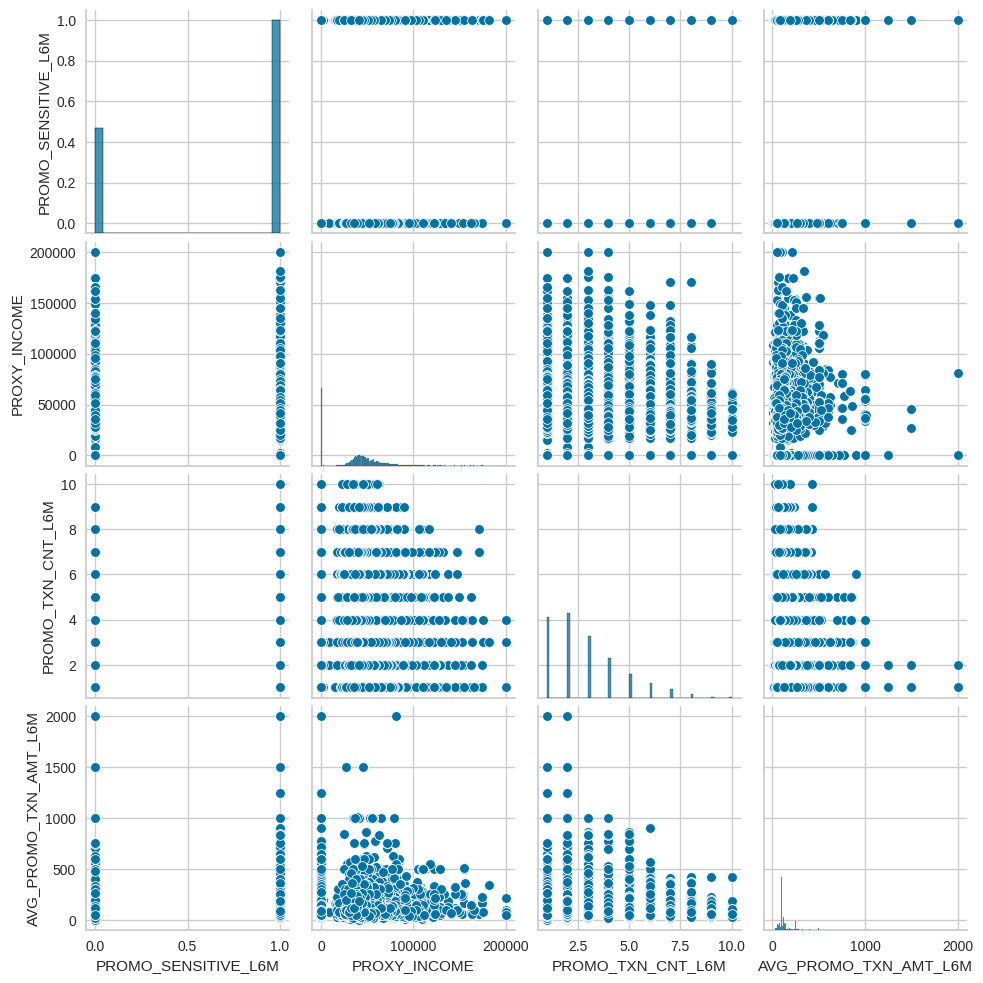

In [ ]:
# sns.pairplot(kmeans)

sns.pairplot(kmeans)

In [ ]:
kmeans.describe()

,PROMO_SENSITIVE_L6M,PROXY_INCOME,PROMO_TXN_CNT_L6M,AVG_PROMO_TXN_AMT_L6M
count,107658.000000,107658.0,107658.0,107658.0
mean,0.669630,38105.522924,2.824379,125.698001
std,0.470349,25934.62826,1.709551,80.372469
min,0.000000,0.0,1.0,3.2
25%,0.000000,24542.0,1.0,80.0
50%,1.000000,41904.0,2.0,104.3
75%,1.000000,53636.0,4.0,150.0
max,1.000000,200003.0,10.0,2000.0


### Feature Scaling

####Min-Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer# For feature scaling

minmax = MinMaxScaler()

df_mm = pd.DataFrame(minmax.fit_transform(kmeans), columns = kmeans.columns)
df_mm

,PROMO_SENSITIVE_L6M,PROXY_INCOME,PROMO_TXN_CNT_L6M,AVG_PROMO_TXN_AMT_L6M
0,0.0,0.298921,0.111111,0.098558
1,1.0,0.162983,0.111111,0.068510
2,1.0,0.000000,0.111111,0.198718
3,1.0,0.000000,0.555556,0.120042
4,1.0,0.211262,0.333333,0.047226
...,...,...,...,...
107653,1.0,0.000000,0.111111,0.048478
107654,0.0,0.177662,0.000000,0.058494
107655,0.0,0.000000,0.222222,0.021785
107656,1.0,0.206242,0.111111,0.093550


In [ ]:
df_mm.describe()

,PROMO_SENSITIVE_L6M,PROXY_INCOME,PROMO_TXN_CNT_L6M,AVG_PROMO_TXN_AMT_L6M
count,107658.000000,107658.000000,107658.000000,107658.000000
mean,0.669630,0.190525,0.202709,0.061347
std,0.470349,0.129671,0.189950,0.040251
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.122708,0.000000,0.038462
50%,1.000000,0.209517,0.111111,0.050631
75%,1.000000,0.268176,0.333333,0.073518
max,1.000000,1.000000,1.000000,1.000000


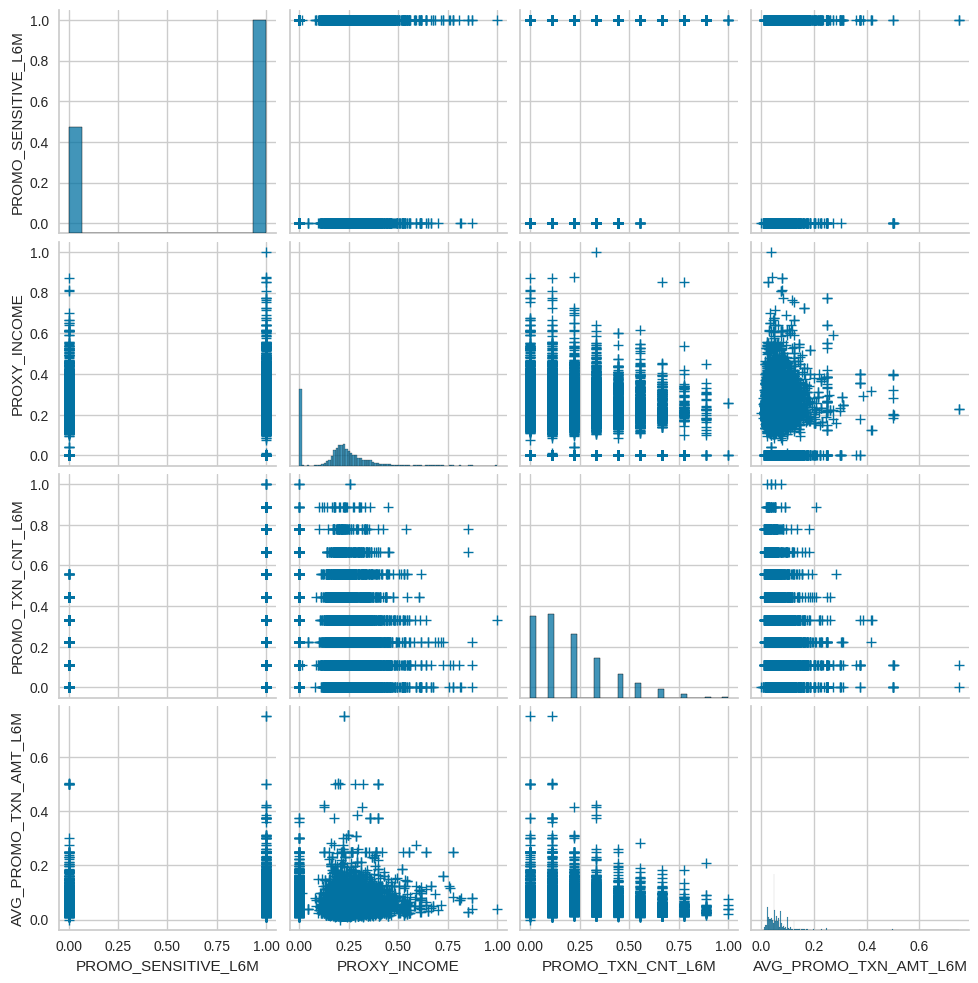

In [ ]:
sns.pairplot(df_mm.sample(frac = 0.1), plot_kws = {'marker': '+','linewidth':1})

####Power Transformer

In [ ]:
ptr = PowerTransformer()
df_pt = pd.DataFrame(ptr.fit_transform(kmeans), columns = kmeans.columns)
df_pt

,PROMO_SENSITIVE_L6M,PROXY_INCOME,PROMO_TXN_CNT_L6M,AVG_PROMO_TXN_AMT_L6M
0,-1.423695,0.714395,-0.301379,1.155678
1,0.702398,0.270933,-0.301379,0.494976
2,0.702398,-1.725086,-0.301379,2.389649
3,0.702398,-1.725086,1.554207,1.508283
4,0.702398,0.450154,0.873147,-0.193013
...,...,...,...,...
107653,0.702398,-1.725086,-0.301379,-0.144290
107654,-1.423695,0.328862,-1.370404,0.204019
107655,-1.423695,-1.725086,0.382104,-1.646181
107656,0.702398,0.432910,-0.301379,1.061742


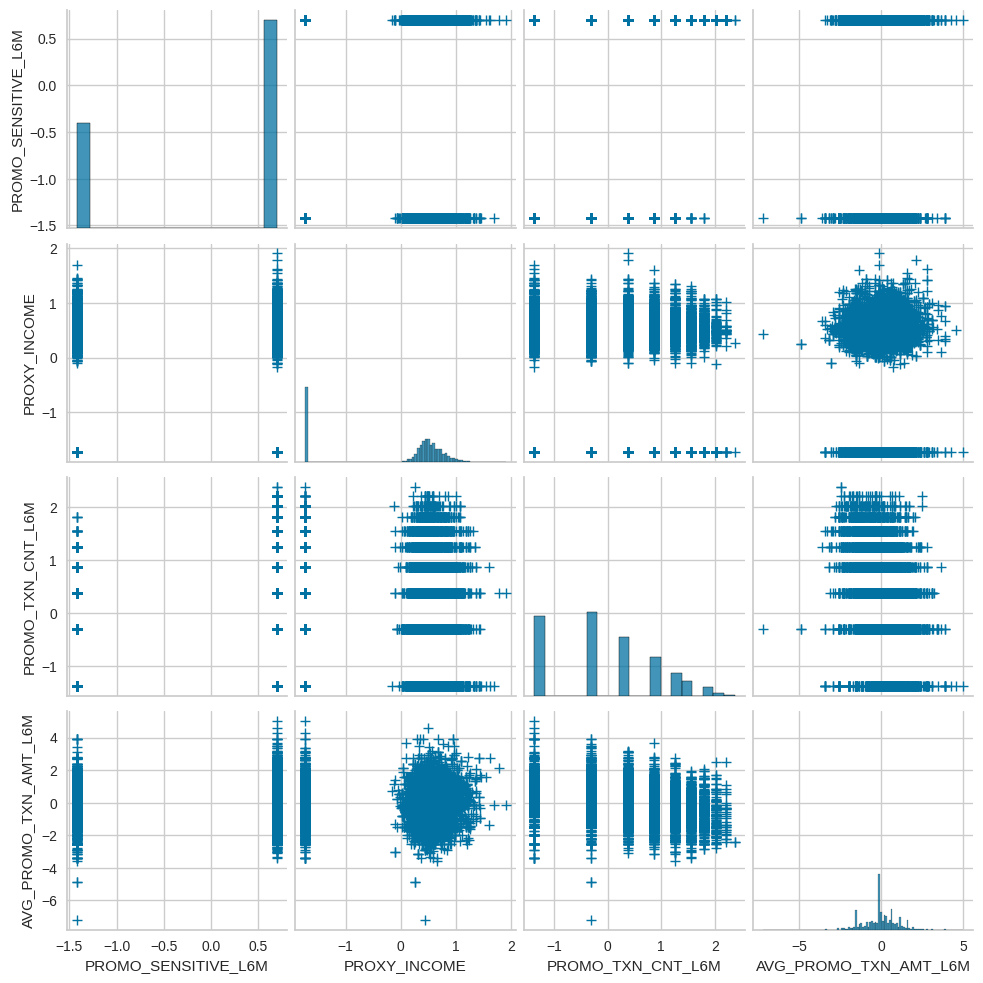

In [ ]:
sns.pairplot(df_pt.sample(round(0.1*df_pt.shape[0])),
            plot_kws={'marker': '+', 'linewidth': 1},
            )

###Determining Number of Clusters

#### Elbow Method (Using Min-max scaler result)
- Depends on distortion value (distortion is measure of how far each points to the center of cluster; the smallest the better)
- But usually we don't want to have too big number of cluster (not very actionable)
- Therefore we aim to choose the "elbow" -- number of cluster with low enough distortion value, but small count of cluster

In [ ]:
# ls_model_kmeans = []
# ls_inertia = []

# for K in range(1,15):
#   kmeanModel = KMeans(n_clusters = K, random_state = 1000, n_init = 'auto')
#   kmeanModel.fit(kmeans)
#   ls_model_kmeans.append(kmeanModel)
#   ls_inertia.append(kmeanModel.inertia_)
#   print(kmeanModel.inertia_)

# ls_model_kmeans

ls_model_kmeans = []
ls_inertia = []

for K in range(1,15):
  kmeanModel = KMeans(n_clusters = K, random_state = 1000, n_init = 'auto')
  kmeanModel.fit(df_mm)
  ls_model_kmeans.append(kmeanModel)
  ls_inertia.append(kmeanModel.inertia_)
  print(kmeanModel.inertia_)

# ls_model_kmeans


# ls_model_df_pt = []
# ls_inertia = []

# for K in range(1,15):
#   kmeanModel = KMeans(n_clusters = K, random_state = 1000, n_init = 'auto')
#   kmeanModel.fit(kmeans)
#   ls_model_df_pt.append(kmeanModel)
#   ls_inertia.append(kmeanModel.inertia_)
#   print(kmeanModel.inertia_)

29685.726440940096
5010.026897224535
3187.9083937291844
2589.66093752705
2193.4510945061347
1784.890076579783
1590.6289645858892
1410.4067024836768
1307.8869159457568
1143.7248514173789
1001.4184579798443
954.364243905678
894.1227325110949
813.5196227634444


In [ ]:
# ls_model_kmeans[2].labels_

ls_model_kmeans[2].labels_

# ls_model_df_pt[2].labels_

array([0, 1, 1, ..., 0, 1, 2], dtype=int32)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

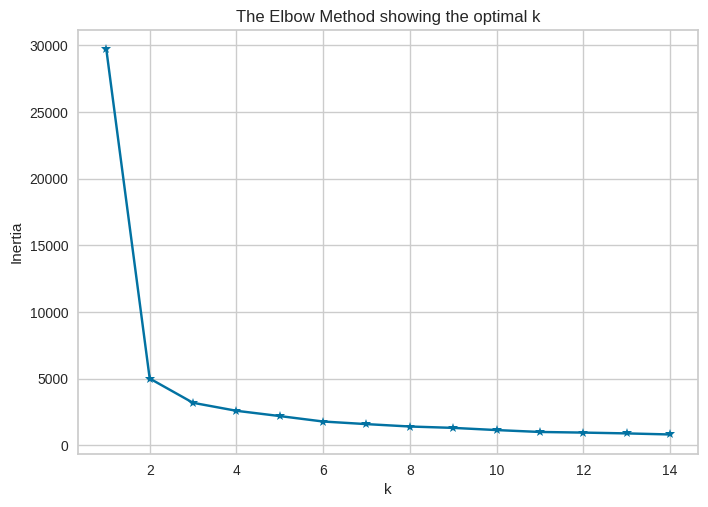

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(1,15), ls_inertia, 'b*-')
ax.set_xlabel('k')
ax.set_ylabel('Inertia')
ax.set_title('The Elbow Method showing the optimal k')

###Silhouette Method
- Depends on silhouette score, ranged between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.
- This is particularly useful for determining cluster imbalance, or for selecting a value for  by comparing multiple visualizers.

In [ ]:
K = range(2,15)
max_K = max(K)
sil_score = []
# fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,50))

for n_clusters in K:
  # kmeanModel = KMeans(n_clusters, random_state = 1000, n_init='auto')
  # kmeanModel.fit(df2.values)

  q, mod = divmod(n_clusters,2)
  print(n_clusters)
  print('q: ',q)
  print('mod',mod)
  print(f'ax[{q-1}][{mod}]')
  print('\n')

  # sil = SilhouetteVisualizer(kmeanModel, is_fitted = True, ax = ax[q-1][mod])
  # sil.fit(df2.values)
  # sil.finalize()
  # sil_score.append(sil.silhouette_score_)
  # print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

2
q:  1
mod 0
ax[0][0]


3
q:  1
mod 1
ax[0][1]


4
q:  2
mod 0
ax[1][0]


5
q:  2
mod 1
ax[1][1]


6
q:  3
mod 0
ax[2][0]


7
q:  3
mod 1
ax[2][1]


8
q:  4
mod 0
ax[3][0]


9
q:  4
mod 1
ax[3][1]


10
q:  5
mod 0
ax[4][0]


11
q:  5
mod 1
ax[4][1]


12
q:  6
mod 0
ax[5][0]


13
q:  6
mod 1
ax[5][1]


14
q:  7
mod 0
ax[6][0]




For k=2, the average silhouette score is 0.7517932562075942
For k=3, the average silhouette score is 0.5385893323671959
For k=4, the average silhouette score is 0.5415031795254375
For k=5, the average silhouette score is 0.431980740776549
For k=6, the average silhouette score is 0.4218631369730147


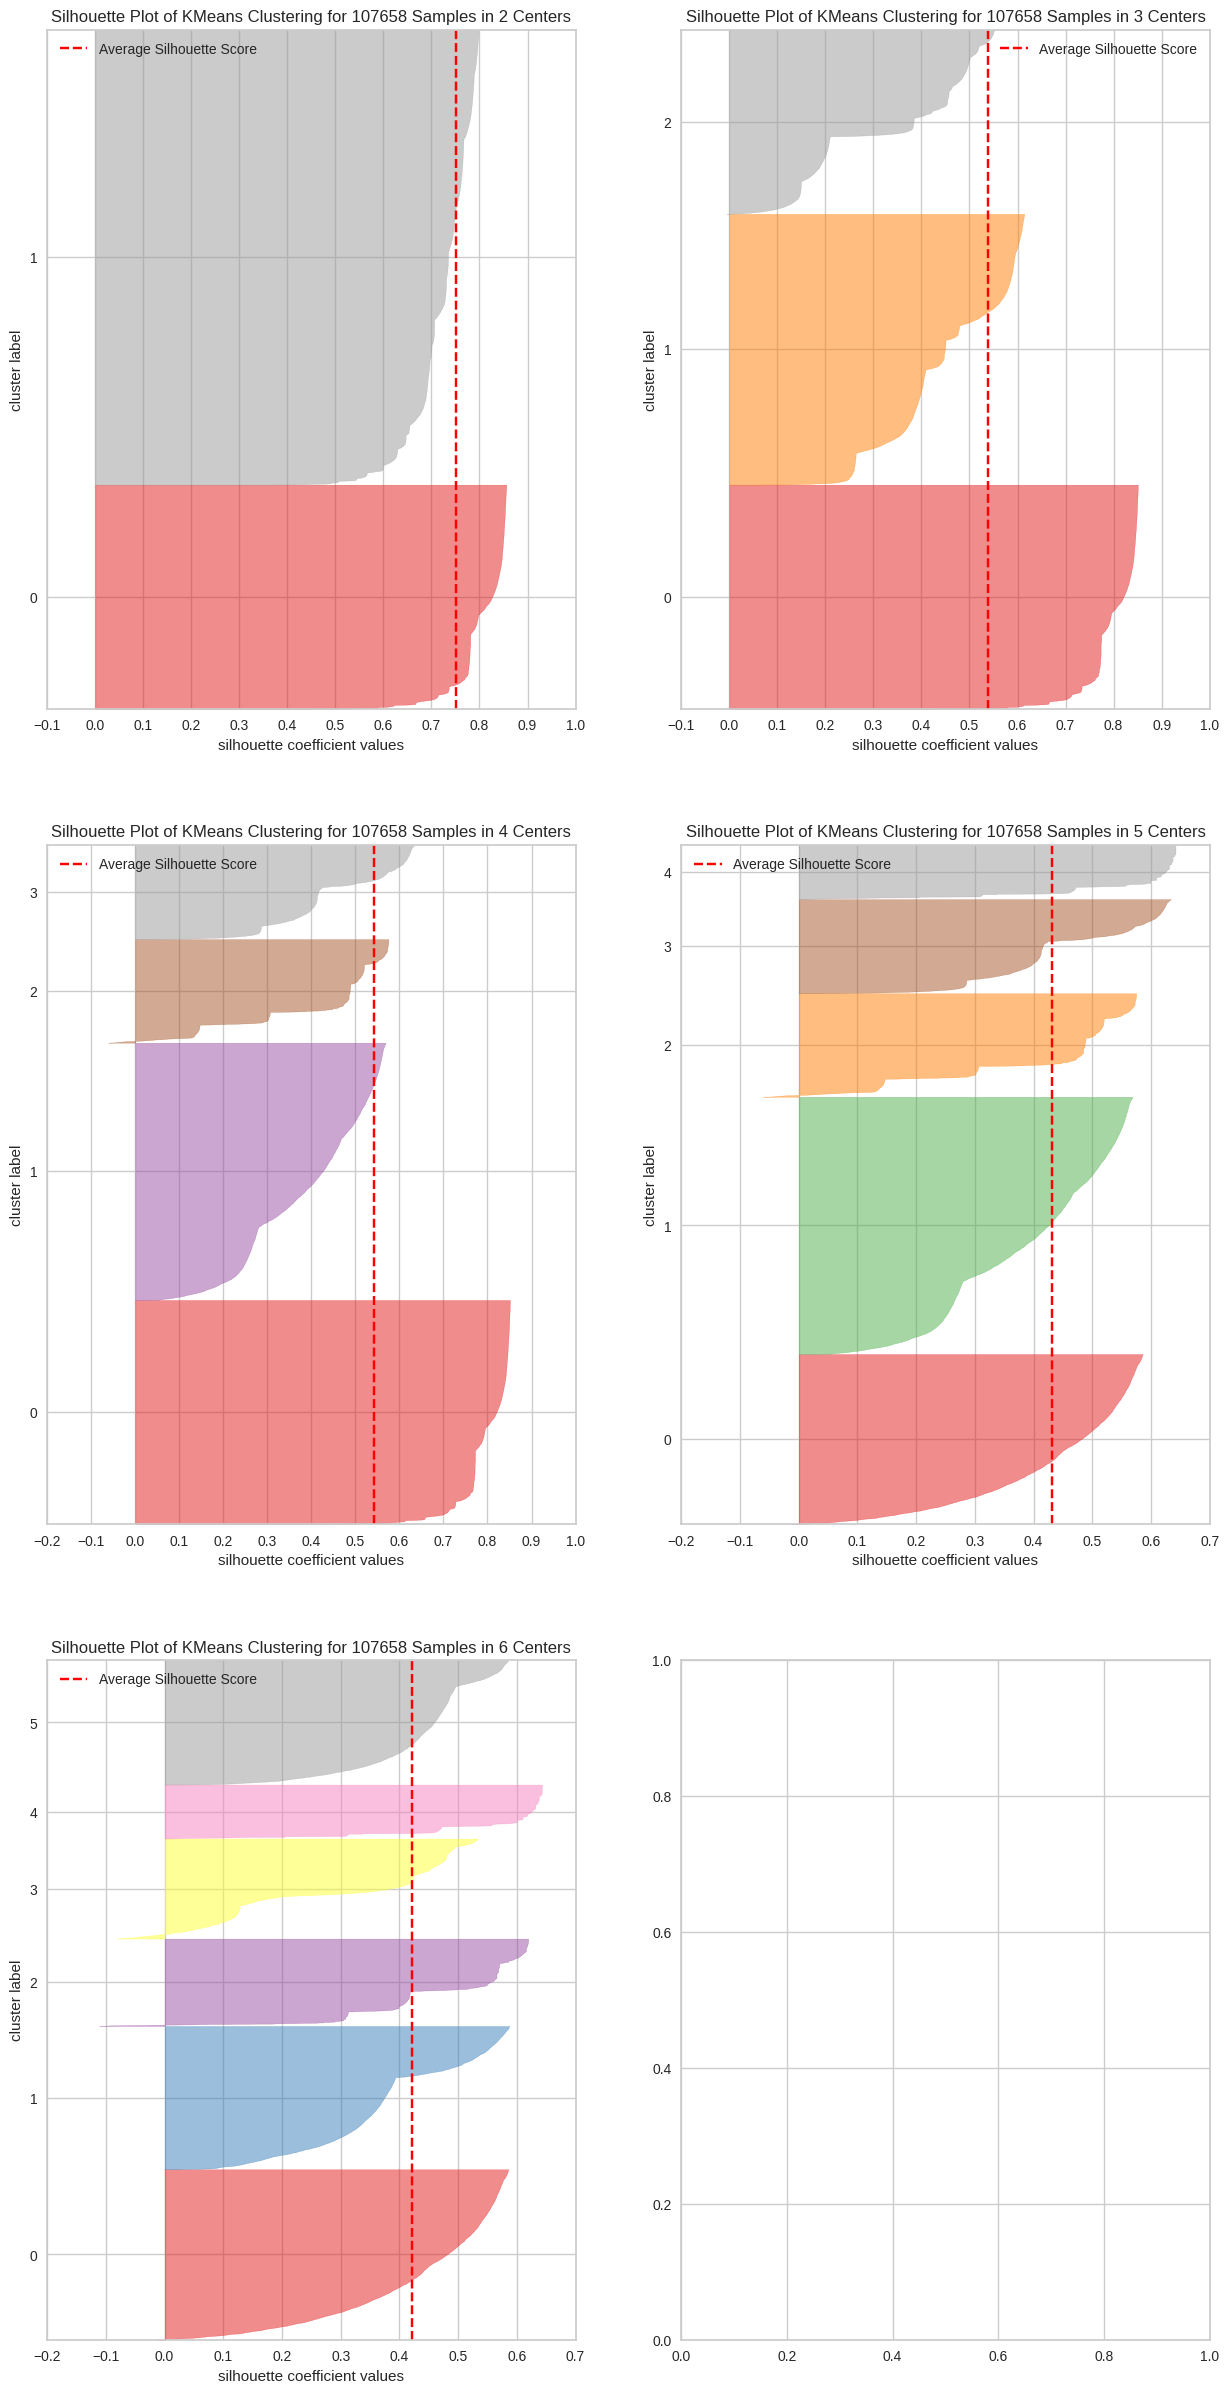

In [ ]:
K = range(2,7)
max_K = max(K)
sil_score = []
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 1000, n_init='auto')
  kmeanModel.fit(df_mm.values)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = True, ax = ax[q-1][mod])
  sil.fit(df_mm.values)
  sil.finalize()
  sil_score.append(sil.silhouette_score_)
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
# fig, ax = plt.subplots(len(K),1, figsize = (5,40))
sil_score

[0.7517932562075942,
 0.5385893323671959,
 0.5415031795254375,
 0.431980740776549,
 0.4218631369730147]

###Interpreting The Cluster

In [ ]:
# Create the final cluster model
# Initialize KMeans for 4 clusters

cluster_model = KMeans(n_clusters = 4, random_state = 1000, n_init='auto')
cluster_model.fit(df_mm)

# cluster_model = KMeans(n_clusters = 3, random_state = 1000, n_init='auto')
# cluster_model.fit(df_pt)

KMeans(n_clusters=4, n_init='auto', random_state=1000)

In [ ]:
kmeans3 = df_mm.copy()
kmeans3['cluster'] = cluster_model.labels_
kmeans3

# kmeans3 = df_pt.copy()
# kmeans3['cluster'] = cluster_model.labels_
# kmeans3

,PROMO_SENSITIVE_L6M,PROXY_INCOME,PROMO_TXN_CNT_L6M,AVG_PROMO_TXN_AMT_L6M,cluster
0,0.0,0.298921,0.111111,0.098558,0
1,1.0,0.162983,0.111111,0.068510,1
2,1.0,0.000000,0.111111,0.198718,2
3,1.0,0.000000,0.555556,0.120042,3
4,1.0,0.211262,0.333333,0.047226,1
...,...,...,...,...,...
107653,1.0,0.000000,0.111111,0.048478,2
107654,0.0,0.177662,0.000000,0.058494,0
107655,0.0,0.000000,0.222222,0.021785,0
107656,1.0,0.206242,0.111111,0.093550,1


In [ ]:
# Describe each groups of cluster
kmeans3.groupby(['cluster']).agg({
    'PROXY_INCOME':['mean']
    ,'PROMO_TXN_CNT_L6M':['median']
    ,'AVG_PROMO_TXN_AMT_L6M':['mean']
    , 'PROMO_SENSITIVE_L6M' : ['mean']
})

,PROXY_INCOME,PROMO_TXN_CNT_L6M,AVG_PROMO_TXN_AMT_L6M,PROMO_SENSITIVE_L6M
,mean,median,mean,mean
cluster,,,,
0,0.191342,0.000000,0.058531,0.0
1,0.258287,0.222222,0.066942,1.0
2,0.006985,0.222222,0.067762,1.0
3,0.205246,0.555556,0.045696,1.0


Cluster 0 : Medium Income, Not Senvitive to Promo`

Cluster 1 : High Income, Sensitive To Promo of the expensive stuff

Cluster 2 : Low Income, Sensitive To Promo of the expensive stuff

Cluster 3 : Medium Income, Very Sensitive to Promo of Cheap Stuff

Business Recomendation:

Cluster number 0	: since they are not sensitive to the promo, we need to dig deeper their behavior and interest to increase their spending.

Cluster number 1	: give exclusive offering for a luxury stuff, we can aim higher amount of purchase for this cluster. So, the percentage of the ‘cost of promotion’ could be less.

Cluster number 2	: give more campaigns to ‘alert’ them to buy, to increase their purchasing number.

Cluster number 3	: since their average amount of transaction is low, we can try to give points based on the percentage of the spending to reduce our promotion cost, or we can add minimum purchase for them to get a points, so they will spend more.